# mrbles pipeline example

## Load necessary modules

In [50]:
import importlib
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib tk
import mrbles

In [54]:
importlib.reload(mrbles)
importlib.reload(mrbles.pipeline)

Copyright 2017 - The Encoded Beads Project - ThornLab@UCSF and FordyceLab@Stanford


<module 'mrbles.pipeline' from 'G:\\My Drive\\[Stanford]\\DEV\\Encoded Beads Project\\Bead Analysis\\mrbles\\pipeline.py'>

## Load image set

The dictionary keys of image folders and image pattersn must match.
The instatiatiation of the object will search for the files. An error is thrown if no images are found.

In [2]:
image_folders = {
    "mrbles-test-set": r"../data",
    "mrbles-test-set-2": r"../data",
}
image_patterns = {
    "mrbles-test-set": r"peptide_biotin_streptavidin_([0-9][0-9])_MMStack_Pos0.ome.tif",
    "mrbles-test-set-2": r"peptide_biotin_streptavidin_([0-9][0-9])_MMStack_Pos0.ome.tif"
}
mrbles_images = mrbles.Images(folders=image_folders, file_patterns=image_patterns)
mrbles_images.crop_x = slice(90, 990)
mrbles_images.crop_y = slice(90, 990)

If no error was thrown the images can be loaded into memory.

In [3]:
mrbles_images.load()

The internal Xarray DataArray can be sliced using Xarray syntax (similar to Pandas).
```python
mrbles_images['set name', file number, 'channel name', y-slice, x-slice]
```

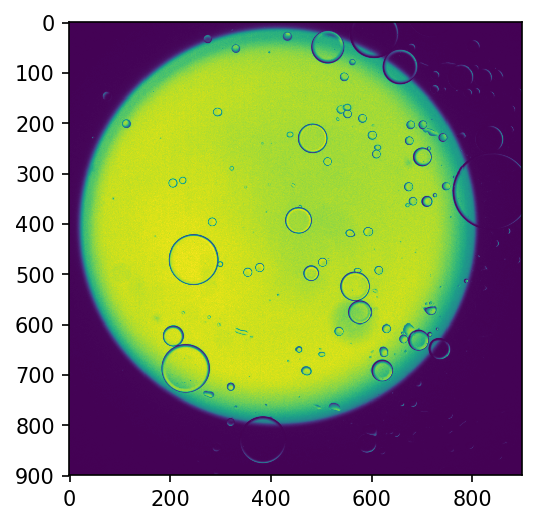

In [4]:
plt.figure(dpi=150)
plt.imshow(mrbles_images['mrbles-test-set', 0, 'Brightfield']);

In [5]:
mrbles_images['mrbles-test-set', 0, :]

<xarray.DataArray (c: 11, y: 900, x: 900)>
array([[[145, 118, ..., 138, 148],
        [139, 145, ..., 143, 145],
        ..., 
        [159, 127, ..., 144, 149],
        [127, 130, ..., 126, 144]],

       [[195, 158, ..., 167, 155],
        [180, 149, ..., 168, 175],
        ..., 
        [136, 141, ..., 121, 121],
        [143, 129, ..., 143, 136]],

       ..., 
       [[113,  98, ..., 100, 102],
        [100, 107, ...,  97,  99],
        ..., 
        [ 96,  98, ..., 102, 102],
        [109, 100, ..., 101,  93]],

       [[109,  99, ...,  91,  99],
        [103, 100, ...,  98, 102],
        ..., 
        [100, 100, ..., 101,  99],
        [103, 105, ..., 106, 107]]], dtype=uint16)
Coordinates:
  * c        (c) <U11 'Cy5_5%' 'Brightfield' 'l-435' 'l-474' 'l-536' 'l-546' ...
    set      <U15 'mrbles-test-set'
Dimensions without coordinates: y, x

## Find MRBLEs in images

In [6]:
find_mrbles = mrbles.Find(bead_size=18, border_clear=True, circle_size=350)
find_mrbles.settings.eccen_max = 0.65

In [7]:
mrbles_images_masks = find_mrbles.find(mrbles_images[:, : , 'Brightfield'], 
                                       mrbles_images[:])

In [8]:
find_mrbles['mrbles-test-set', 0, 'inside']

<xarray.DataArray (y: 900, x: 900)>
array([[ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       ..., 
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.]])
Coordinates:
    c        <U9 'inside'
    set      <U15 'mrbles-test-set'
Dimensions without coordinates: y, x

In [9]:
mrbles_images_masks.data.coords['set'] = ['mrbles-test-set', 'mrbles-test-set-3']

In [10]:
mrbles_images_masks

[<xarray.DataArray (set: 2, f: 10, c: 17, y: 900, x: 900)>
array([[[[[ 195., ...,  155.],
          ..., 
          [ 143., ...,  136.]],

         ..., 
         [[   0., ...,    0.],
          ..., 
          [   0., ...,    0.]]],


        ..., 
        [[[ 218., ...,  169.],
          ..., 
          [ 150., ...,  163.]],

         ..., 
         [[   0., ...,    0.],
          ..., 
          [   0., ...,    0.]]]],



       [[[[ 195., ...,  155.],
          ..., 
          [ 143., ...,  136.]],

         ..., 
         [[   0., ...,    0.],
          ..., 
          [   0., ...,    0.]]],


        ..., 
        [[[ 218., ...,  169.],
          ..., 
          [ 150., ...,  163.]],

         ..., 
         [[   0., ...,    0.],
          ..., 
          [   0., ...,    0.]]]]])
Coordinates:
  * c        (c) object 'Brightfield' 'Cy5_5%' 'bkg' 'image_roi' 'inside' ...
  * set      (set) <U17 'mrbles-test-set' 'mrbles-test-set-3'
Dimensions without coordinates: f, y, x]

In [11]:
find_mrbles.beads_per_set

{'mrbles-test-set': 827, 'mrbles-test-set-2': 827}

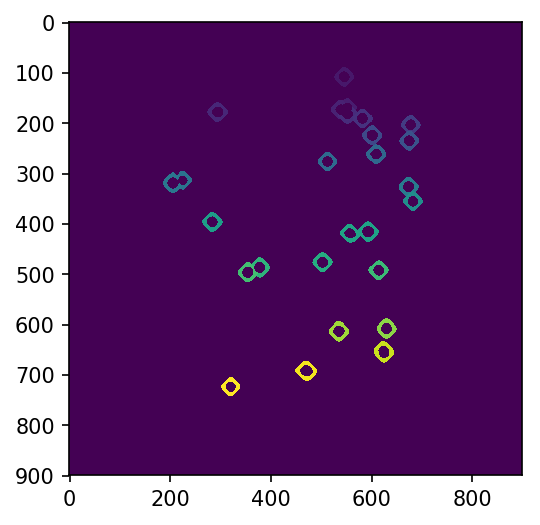

In [12]:
plt.figure(dpi=150)
plt.imshow(mrbles_images_masks['mrbles-test-set', 0, 'bkg']);

## Create Reference spectra

In [13]:
# Channel settings
DECODE_CHANNELS = slice('l-435','l-780')  # Channel range for decoding
OBJECT_CHANNEL = 'Brightfield'  # Channel for bead finding

# Reference files
REF_FOLDER = {
    "Dy": r"C:\Users\bjorn\Desktop\20170406 - Reference files - KARA",
    "Sm": r"C:\Users\bjorn\Desktop\20170406 - Reference files - KARA",
    "Tm": r"C:\Users\bjorn\Desktop\20170406 - Reference files - KARA",
    "Eu": r"C:\Users\bjorn\Desktop\20170406 - Reference files - KARA",
    "bkg": r"C:\Users\bjorn\Desktop\20170406 - Reference files - KARA"
}
REF_FILES = {"Dy" : "Dy_Solos_3_MMStack_Pos0.ome.tif",
             "Sm" : "Sm_solos_5_MMStack_Pos0.ome.tif",
             "Tm" : "Tm_solos_3_MMStack_Pos0.ome.tif",
             "Eu" : "Eu_solos_6_MMStack_Pos0.ome.tif",
             "bkg" : "20170320_blank_1_MMStack_Pos0.ome.tif"}

In [14]:
spec_object = mrbles.References(REF_FOLDER, REF_FILES, OBJECT_CHANNEL, DECODE_CHANNELS)
spec_object.crop_x = slice(312, 712)
spec_object.crop_y = slice(312, 712)

In [15]:
spec_object.load()

In [16]:
spec_object

[                Dy        Sm        Tm        Eu       bkg
channels                                                  
l-435     0.008220  0.015773  0.031045  0.007665  0.116803
l-474     0.401585  0.027759  0.636704  0.013162  0.175410
l-536     0.009447  0.026656  0.041320  0.024531  0.120082
l-546     0.003424  0.007191  0.013051  0.008729  0.060656
l-572     0.530437  0.110413  0.020771  0.008610  0.086885
l-620     0.000824  0.021910  0.002166  0.555770  0.050000
l-630     0.025265  0.300556  0.015939  0.336552  0.081967
l-650     0.006042  0.463371  0.026713  0.038205  0.053279
l-780     0.014756  0.026369  0.212290  0.006778  0.254918]

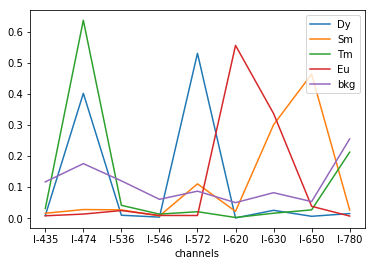

In [17]:
spec_object.plot()

## Spectral unmixing and get ratios

In [18]:
spec_unmix = mrbles.SpectralUnmixing(spec_object)

In [19]:
spec_unmix.unmix(mrbles_images_masks['mrbles-test-set', 0, DECODE_CHANNELS])

In [20]:
spec_unmix

[<xarray.DataArray (c: 5, y: 900, x: 900)>
array([[[ 105.030501,  100.093676, ...,  101.689812,   90.648369],
        [ 100.681169,  109.251951, ...,  104.059808,   80.673083],
        ..., 
        [  94.412361,   75.250821, ...,   77.517095,   66.474336],
        [  78.560867,   91.221591, ...,   92.565277,  104.027779]],

       [[ 109.893556,   97.944182, ...,  104.153145,  100.878954],
        [  93.798561,  105.107001, ...,   79.569097,  113.601457],
        ..., 
        [ 114.849494,  109.287005, ...,  111.207688,  119.233207],
        [ 113.134563,  107.029259, ...,   92.581438,   89.424863]],

       ..., 
       [[ 106.313088,  105.409739, ...,   88.816998,  118.927629],
        [ 105.121246,  108.885817, ...,  116.58164 ,   82.490892],
        ..., 
        [ 102.658928,   99.657417, ...,  114.113386,   97.335334],
        [ 116.295385,   97.63329 , ...,  127.341185,  105.650435]],

       [[ 724.840464,  588.105481, ...,  604.040726,  658.130947],
        [ 652.769022,  76

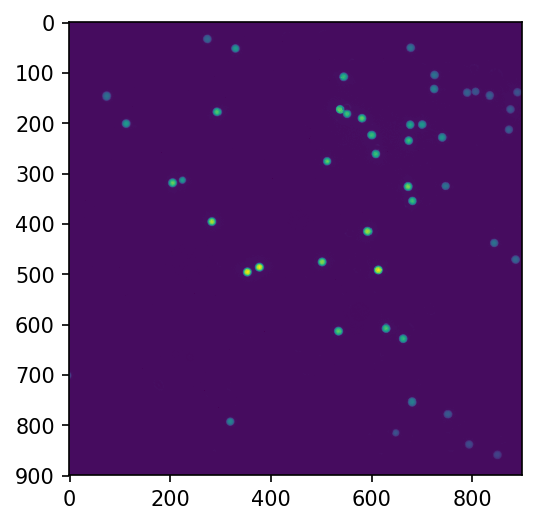

In [21]:
plt.figure(dpi=150)
plt.imshow(spec_unmix['Eu'])

In [43]:
sets = ['Dy', 'Sm', 'Tm']
test =  np.divide(spec_unmix[sets], spec_unmix['Eu'])
test.coords['c'] = ['Dy_ratio', 'Sm_ratio', 'Tm_ratio']
plt.figure()
plt.imshow(test.loc['Dy_ratio'])

In [23]:
ratio_images = mrbles.Ratio(spec_object)

In [46]:
ratio_images.get(mrbles_images_masks['mrbles-test-set', 0, DECODE_CHANNELS], 'Eu')

In [41]:
ratio_images['Tm_ratio']

<xarray.DataArray (y: 900, x: 900)>
array([[-0.324417,  0.420269, -0.231288, ..., -0.203654,  0.268189,  0.069349],
       [ 0.128713, -0.644599, -0.414697, ..., -0.496304, -0.396644,  0.382993],
       [-0.024444, -0.336048, -0.300082, ..., -0.060315,  0.155995, -0.054463],
       ..., 
       [-0.024262, -0.351388, -0.268273, ..., -0.183057, -0.075115, -0.552269],
       [ 0.083091, -0.804834, -0.088988, ...,  0.074942,  0.032983, -0.285537],
       [-0.320349, -1.057117, -1.247589, ..., -0.816795, -0.185888, -0.270534]])
Coordinates:
    c        <U8 'Tm_ratio'
Dimensions without coordinates: y, x

In [49]:
plt.figure(dpi=150)
plt.imshow(ratio_images['Tm'])

In [208]:
extract_data = mrbles.Extract()

In [216]:
mrbles_images_masks['mrbles-test-set', 0, DECODE_CHANNELS].shape

(9, 900, 900)

In [215]:
extract_data.run(mrbles_images_masks['mrbles-test-set', 0, DECODE_CHANNELS], mrbles_images_masks['mrbles-test-set', 0, ['inside','ring']])

KeyError: 'f'

In [214]:
extract_data.pdata

l-435.inside  l-435.ring  l-474.inside  l-474.ring  l-536.inside  \
0 0          1138.0       861.0        5205.0      3130.0        1623.0   
  1           765.0       722.0        1151.0      1157.5         632.0   
  2          1337.0       904.0        5439.0      3847.0        1917.0   
  3          1180.0       832.5        5466.5      2852.5        1691.0   
  4          1148.0       880.0        5442.0      2691.0        1637.5   
  5          1433.0      1171.0        6275.0      3792.0        1944.0   
  6          1374.0      1075.0        5897.0      3366.0        1489.0   
  7          1448.0      1092.0       11823.0      6285.0        1993.0   
  8          1261.0       991.0        3080.0      2055.0        1612.0   
  9          1631.0      1325.0       11668.0      6049.5        1920.5   
  10         1446.0       957.0        3360.0      1902.0        1843.5   
  11         1331.0       887.0        2820.0      1700.0        1637.0   
  12         1419.0      1040.0        5945.0      3055.0        1800.0   
  13         1339.0      1126.0        6436.0      3866.0        1890.5   
  14         3113.0      2078.0       10775.5      6841.0        2092.5   
  15         1583.0      1153.0        7532.0      3980.0        2259.0   
  16         1438.5      1198.0        7137.5      3638.0        2001.5   
  17         1263.0       882.0        1844.0      1241.0         982.0   
  18         1521.0      1146.5        6709.5      3207.0        1992.5   
  19         1453.5      1026.0        3905.0      2024.5        2073.0   
  20         1440.0      1082.0        4446.0      3186.0        2154.0   
  21         1684.5      1222.0        4168.0      2432.5        2126.5   
  22         1425.0      1174.0        6240.0      3646.0        1792.0   
  23         2520.0      2130.5       12317.0      6948.5        2788.5   
  24          876.0       811.0        1249.0      1109.0         714.0   
  25          990.0       874.0        1411.0      1223.0         778.0   
  26         1194.0       782.0        1723.0      1123.0         933.0   
1 0           994.0       748.0        5672.5      3118.0        1352.0   
  1          1287.0       896.0        9861.0      5054.5        1572.0   
  2          1291.5       985.0        3148.5      1983.0        1634.0   
...             ...         ...           ...         ...           ...   
9 71         1240.0       964.0        6199.0      3202.0        1656.0   
  72         1220.0      1043.5        2718.0      1889.5        1535.0   
  73         1476.0      1159.5       10810.0      5363.0        1965.0   
  74         1361.0      1044.5        5467.0      3106.5        1549.0   
  75         1683.0      1176.5        3623.0      2195.5        1997.0   
  76         1304.0       988.0        1780.5      1351.0        1712.5   
  77         1519.5      1191.5        4815.5      2827.0        1847.5   
  78         1543.5      1196.0        6811.5      3869.0        2017.0   
  79         1252.0       984.0        4654.5      2723.0        1634.0   
  80         1641.0      1274.0        6796.0      3618.0        1962.0   
  81         1262.0       980.0        5413.0      3250.0        1671.0   
  82         1183.0       923.0       11094.0      6067.0        1619.0   
  83         1927.0      1334.0        9579.0      5466.5        1884.0   
  84         1338.5      1074.0        6498.5      3585.0        1752.5   
  85         1573.0      1408.5        6360.0      4736.5        1962.0   
  86         1206.0       910.5        4742.0      2723.0        1610.5   
  87         1611.5      1238.0       13086.5      7394.5        2023.5   
  88         1272.0       988.5        1717.0      1297.0        1595.0   
  89         1322.0      1122.5        6456.0      3827.5        1741.0   
  90         1514.5      1297.0        3557.0      2331.0        2002.5   
  91         1275.0      1215.0        2704.0      2040.5        1465.0   
  92         1858.5      1384.0 

In [207]:
importlib.reload(mrbles)
importlib.reload(mrbles.pipeline)
importlib.reload(mrbles)

Copyright 2017 - The Encoded Beads Project - ThornLab@UCSF and FordyceLab@Stanford
Copyright 2017 - The Encoded Beads Project - ThornLab@UCSF and FordyceLab@Stanford


<module 'mrbles' from 'G:\\My Drive\\[Stanford]\\DEV\\Encoded Beads Project\\Bead Analysis\\mrbles\\__init__.py'>